In [1]:
import pandas as pd
# readinag given csv file
# and creating dataframe
df = pd.read_csv("adult.data")
# storing this dataframe in a csv file
df.to_csv('adult.data',index = None)
df

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual-incomerange
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual-incomerange
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.dtypes

Age                    int64
Workclass             object
Fnlwgt                 int64
Education             object
Education-num          int64
Marital-status        object
Occupation            object
Relationship          object
Race                  object
sex                   object
capital-gain           int64
capital-loss           int64
hours-per-week         int64
native-country        object
Annual-incomerange    object
dtype: object

In [4]:
# Removing the initial white spaces from dataframe
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=df[i].map(str.strip)

In [5]:
df.describe()

,Age,Fnlwgt,Education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1.Average age of people 38.
2.Average years for education is 10 years. on an average rate sslc has been completed.
3.people are working for Averagly 8 hours per day.

# Remove data with missing values and Remove outliers

In [7]:
# checking any negative value in numerical data's
print(len(df.loc[(df.Fnlwgt < 0)]))
print(len(df.loc[(df['Education-num'] < 0),:]))
print(len(df.loc[(df['capital-gain'] < 0),:]))
print(len(df.loc[(df['capital-loss']< 0),:]))
print(len(df.loc[(df['hours-per-week'] < 0),:]))

0
0
0
0
0


In [6]:
#text file has '?' for missing values, so changing into unknown
df.replace(to_replace = '?', value ='unknown',inplace = True)

In [7]:
# checking the null values
check_nan = df.isnull().values.any()
check_nan

False

In [10]:
# b) Counting rows that have missing values somewhere:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

0

upperlimit_Age: 74.0
lowerlimit_Age: 17.0
before removing outliers: 32561
after removing outliers: 32275
outlier data: 286


<Axes: >

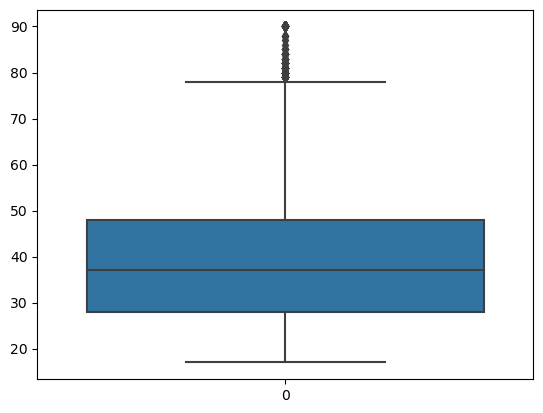

In [11]:
# trimming the outliers of Age data
upperlimit_Age= df['Age'].quantile(0.99)
lowerlimit_Age = df['Age'].quantile(0.01)
print('upperlimit_Age:', upperlimit_Age)
print('lowerlimit_Age:', lowerlimit_Age)
# trimming the outliers of hours-per-week data
df1 = df.loc[(df['Age']<= upperlimit_Age) & (df['Age']>=lowerlimit_Age)]
print('before removing outliers:', len(df))
print('after removing outliers:', len(df1))
print('outlier data:',len(df)-len(df1))
sns.boxplot(df['Age'])

<Axes: >

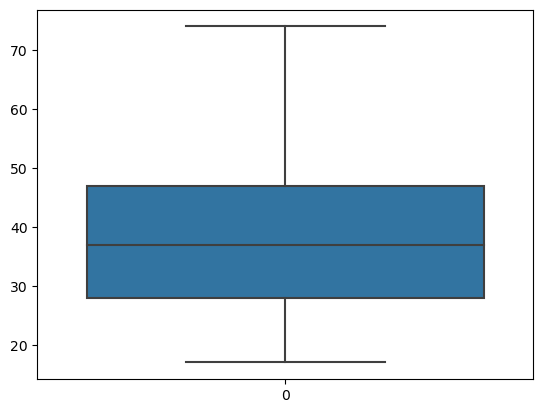

In [12]:
# When compared to original boxplot of age, after removing outiers data below boxplot looks normally distributed data.
sns.boxplot(df1['Age'])

upperlimit_Education-num: 16.0
lowerlimit_Education-num: 3.0
before removing outliers: 32275
after removing outliers: 32062
outlier data: 213


<Axes: >

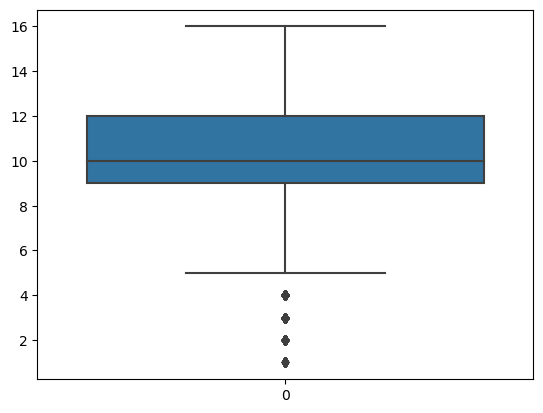

In [16]:
# trimming the outliers of 	Education-num data
upperlimit_Education_num = df1['Education-num'].quantile(0.99)
lowerlimit_Education_num = df1['Education-num'].quantile(0.01)
print('upperlimit_Education-num:', upperlimit_Education_num)
print('lowerlimit_Education-num:', lowerlimit_Education_num)
# trimming the outliers of Education-num data
df2 = df1.loc[(df1['Education-num']<= upperlimit_Education_num) & (df1['Education-num']>=lowerlimit_Education_num)]
print('before removing outliers:', len(df1))
print('after removing outliers:', len(df2))
print('outlier data:',len(df1)-len(df2))
sns.boxplot(df['Education-num'])

<Axes: >

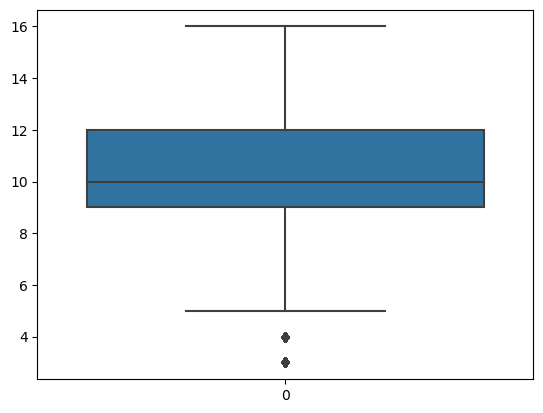

In [17]:
# When compared to original boxplot of Education-num, after removing outiers data below boxplot looks normally distributed data.
sns.boxplot(df2['Education-num'])

In [18]:
# trimming the outliers of hours-per-week data
upperlimit_hours = df2['hours-per-week'].quantile(0.99)
lowerlimit_hours = df2['hours-per-week'].quantile(0.01)
print('upperlimit_hours:', upperlimit_hours)
print('lowerlimit_hours:', lowerlimit_hours)
# trimming the outliers of hours-per-week data
df3 = df2.loc[(df2['hours-per-week']<= upperlimit_hours) & (df2['hours-per-week']>=lowerlimit_hours)]
print('before removing outliers:', len(df2))
print('after removing outliers:', len(df3))
print('outlier data:',len(df2)-len(df3))

upperlimit_hours: 80.0
lowerlimit_hours: 8.0
before removing outliers: 32062
after removing outliers: 31598
outlier data: 464


C:\Users\sneha sundarrajan\AppData\Local\Temp\ipykernel_940\2293642700.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['hours-per-week'])


<Axes: xlabel='hours-per-week', ylabel='Density'>

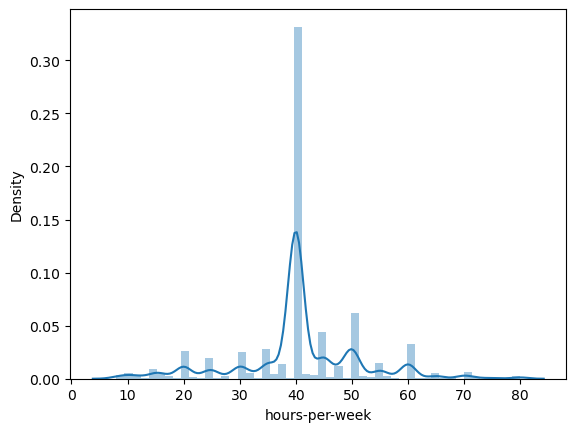

we didn't remove the outliers for Captialgain,loss,fnlwgt columns , since the lot of data loss.

# ANALYSING relation between MALE AND FEMALE 

In [20]:
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [21]:
Age=[df[df['sex']=='Female']['Age'].mean(),df[df['sex']=='Male']['Age'].mean()]
working_hours=[df[df['sex']=='Female']['hours-per-week'].mean(),df[df['sex']=='Male']['hours-per-week'].mean()]
Education=[df[df['sex']=='Female']['Education-num'].mean(),df[df['sex']=='Male']['Education-num'].mean()]

malefemale= pd.DataFrame(list(zip(Age,working_hours,Education)),
               columns =['Age', 'working_hours','Education'],index=['Female','Male'])
malefemale


,Age,working_hours,Education
Female,36.858230,36.410361,10.035744
Male,39.433547,42.428086,10.102891


Females are working 7 hours per day and men are working for 8 hours per day approximately
Both female and male average spent time for education is almost same all were mostly completed 10 level education.

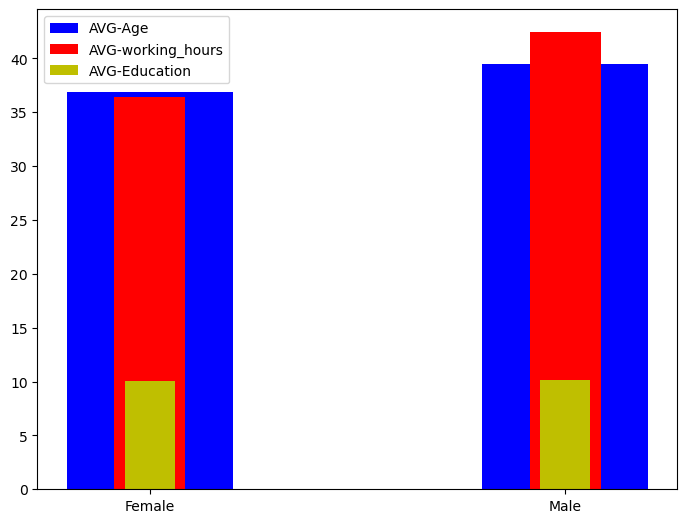

In [45]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])


x = ['Female','Male']
y = malefemale['working_hours']
a = malefemale['Education']
z = malefemale['Age']
plt.bar(x,z,width=0.4,color = 'b', label ='AVG-Age')
plt.bar(x,y,width=0.17,color = 'r', label ='AVG-working_hours')
plt.bar(x,a,width=0.12,color = 'y', label ='AVG-Education')
plt.legend()
plt.show()

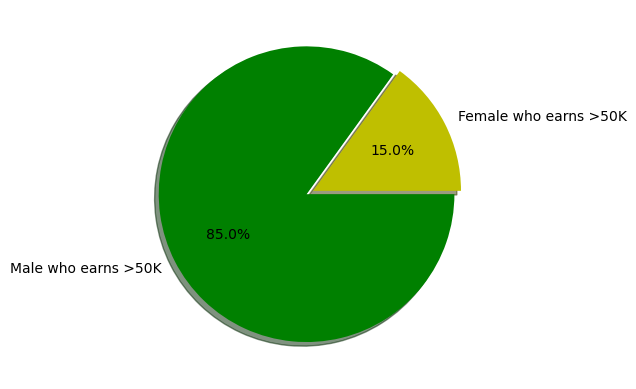

Only One-fifth of female earning more than 50K


In [64]:
a1=df.loc[(df['sex']== 'Female') & (df['Annual-incomerange'] == '>50K')].count()['Age']
a2=df.loc[(df['sex']== 'Male') & (df['Annual-incomerange'] == '>50K')].count()['Age']
a3=[a1,a2]
plt.pie(a3,autopct = '%0.1f%%',colors =['y','green'],explode = [0.05,0], shadow= True,labels=['Female who earns >50K','Male who earns >50K'])
plt.show()
print('Only One-fifth of female earning more than 50K')

In [130]:
s1=df.loc[(df['sex']=='Female')& (df['capital-gain'] != 0)].count()['Age']
s2=df.loc[(df['sex']=='Male')& (df['capital-gain'] != 0)].count()['Age']
print(f'{s1} Female who have capital gain\n{s2} Male who have capital gain')

623 Female who have capital gain
2089 Male who have capital gain


# Analysis based on workclass

Approximately 70% of people are working for private


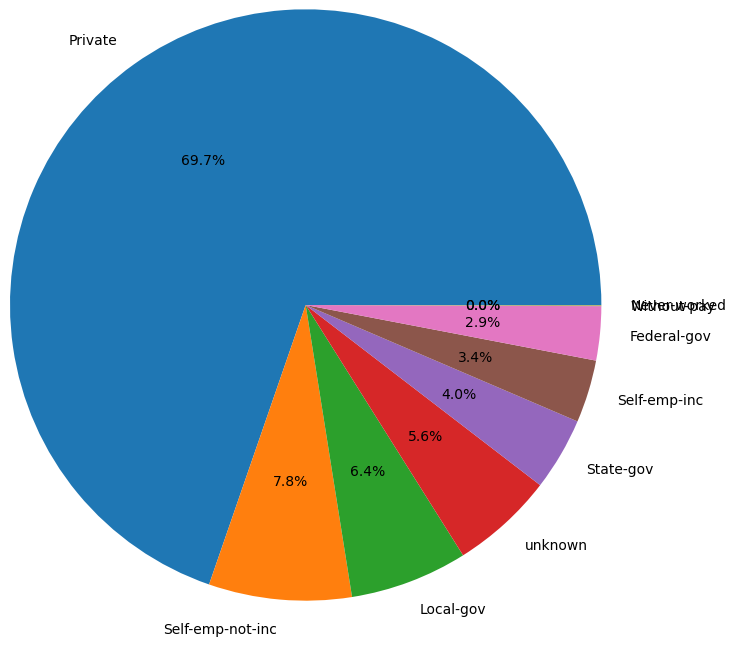

In [116]:
d=df['Workclass'].value_counts()
d1=pd.DataFrame(d)
plt.pie(d1['count'],labels=d1.index,autopct = '%0.1f%%',radius=2)
print('Approximately 70% of people are working for private')

In [140]:
c1=df.loc[(df['Workclass']== 'Private') & (df['Annual-incomerange'] == '>50K')].count()['Age']
c2=df.loc[(df['Workclass']== 'Private') & (df['Annual-incomerange'] == '<=50K')].count()['Age']
c3=df['Workclass'].count()
rich_private_workers = round(c1/c3*100)
poor_private_workers = round(c2/c3*100)
print(f'percent_rich_private_workers:{rich_private_workers}%')
print(f'percent_poor_private_workers:{poor_private_workers}%')

percent_rich_private_workers:15%
percent_poor_private_workers:54%


In [141]:
df['Workclass'].value_counts()

Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [158]:
print('Most of the rich private employees completed thier bachelors and High_school graduation degree')
df.loc[(df['Annual-incomerange']=='>50K')&((df['Workclass']=='Private')),'Education'].value_counts()

Most of the rich private employees completed thier bachelors and High_school graduation degree


Education
Bachelors       1495
HS-grad         1119
Some-college     923
Masters          534
Assoc-voc        256
Prof-school      171
Assoc-acdm       170
Doctorate        132
10th              47
11th              45
12th              23
7th-8th           18
9th               18
5th-6th            7
1st-4th            5
Name: count, dtype: int64

In [156]:
print('Most of the rich government employees completed thier bachelors and masters degree')
df.loc[(df['Annual-incomerange']=='>50K')&((df['Workclass']=='Local-gov') | (df['Workclass']=='State-gov') | (df['Workclass']=='Federal-gov')),'Education'].value_counts()

Most of the rich government employees completed thier bachelors and masters degree


Education
Bachelors       347
Masters         291
HS-grad         212
Some-college    206
Doctorate       103
Prof-school      60
Assoc-acdm       53
Assoc-voc        52
11th              4
12th              4
9th               4
10th              3
7th-8th           1
5th-6th           1
Name: count, dtype: int64

# Relation between age and income

Most of the rich people lies in the age of 30 to 55


<Axes: xlabel='Age', ylabel='count'>

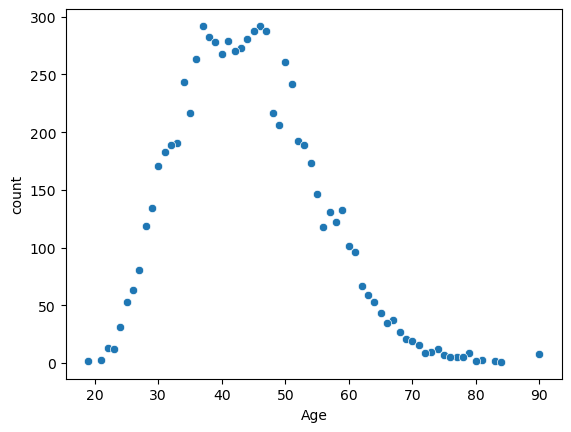

In [194]:
print('Most of the rich people lies in the age of 30 to 55')
w=df.loc[(df['Annual-incomerange']=='>50K'),'Age'].value_counts()
sns.scatterplot(w)

# Establish the importance of the weekly working hours on earning potential

People who work for more than 40 hours per week are getting more than 50k earning annually


<Axes: xlabel='Annual-incomerange', ylabel='hours-per-week'>

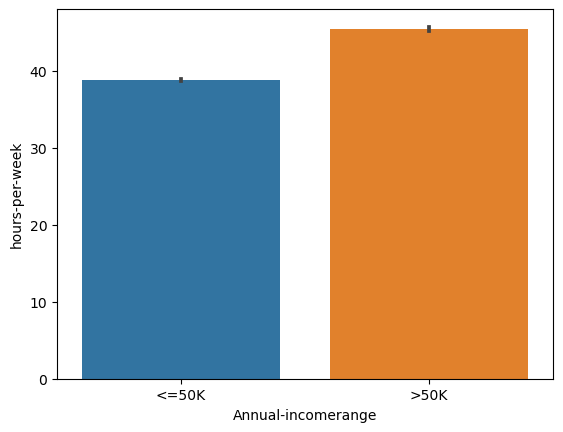

In [195]:
# Establish the importance of the weekly working hours on earning potential
print('People who work for more than 40 hours per week are getting more than 50k earning annually')

sns.barplot(x=df['Annual-incomerange'], y=df['hours-per-week'])

# Analysis based on marital status

In [197]:
df['Marital-status'].value_counts()

Marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

Out of 15417 people 6736 are rich
Out of 17144 people 1105 are rich
People who are married were wealthier than singles


([<matplotlib.patches.Wedge at 0x25ba933f890>,
 [Text(3.712416372073467, 1.400783943707456, 'rich-single'),
  Text(4.287583693501961, -1.4007839302446934, 'poor-single')],
 [Text(3.8431362029491636, 0.764063969294976, '6.4%'),
  Text(4.156863832819251, -0.7640639619516509, '93.6%')])

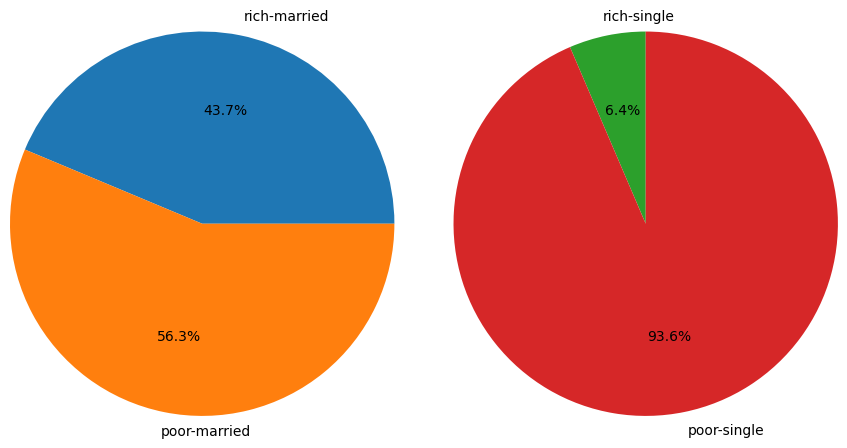

In [241]:
married=df.loc[(df['Marital-status']=='Married-civ-spouse') | (df['Marital-status']=='Married-spouse-absent') | (df['Marital-status']== 'Married-AF-spouse')]
single=df.loc[(df['Marital-status']=='Never-married') | (df['Marital-status']=='Divorced') | (df['Marital-status']== 'Separated') | (df['Marital-status']== 'Widowed')]

a=married.loc[married['Annual-incomerange']=='>50K'].count()['Age']
b=single.loc[single['Annual-incomerange']=='>50K'].count()['Age']
count_married =married['Age'].count()
count_single =single['Age'].count()
print(f'Out of {count_married} people {a} are rich\nOut of {count_single} people {b} are rich\nPeople who are married were wealthier than singles')

ma_percent=[a,count_married-a]
si_percent=[b,count_single-b]
plt.figure()
plt.pie(ma_percent,radius = 1.3,center=(1,0),labels=['rich-married','poor-married'],autopct = '%0.1f%%')
plt.pie(si_percent,radius = 1.3,center=(4,0),labels=['rich-single','poor-single'],autopct = '%0.1f%%',startangle=90)

# Analysis based on education number

1.Most of the rich people whose years of education lies between 10 to 16 years


<Axes: xlabel='Education-num', ylabel='Age'>

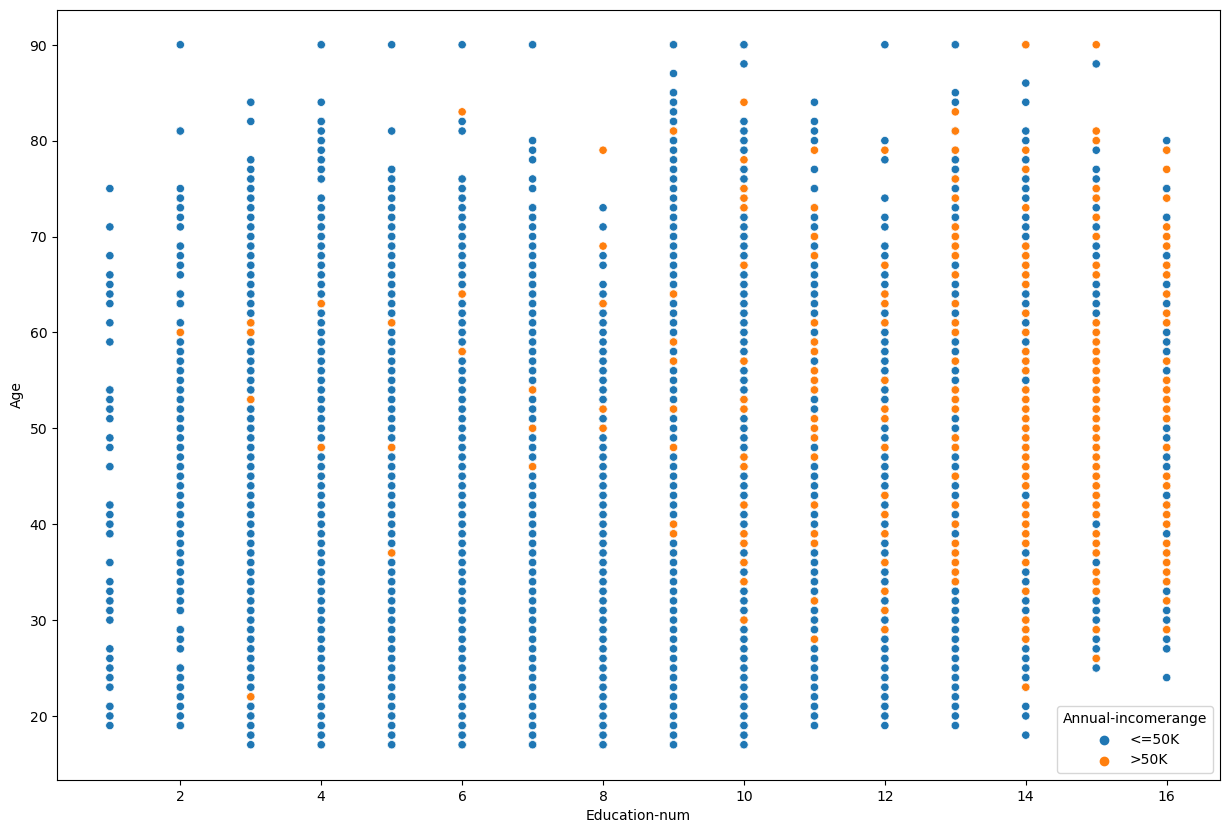

In [264]:
print('''1.Most of the rich people whose years of education lies between 10 to 16 years''')
plt.figure(figsize=[15,10])
sns.scatterplot(x=df['Education-num'],y=df['Age'],hue=df['Annual-incomerange'])

Annual-incomerange   <=50K    >50K
Education-num                     
1                     51.0     0.0
2                    162.0     6.0
3                    317.0    16.0
4                    606.0    40.0
5                    487.0    27.0
6                    871.0    62.0
7                   1115.0    60.0
8                    400.0    33.0
9                   8826.0  1675.0
10                  5904.0  1387.0
11                  1021.0   361.0
12                   802.0   265.0
13                  3134.0  2221.0
14                   764.0   959.0
15                   153.0   423.0
16                   107.0   306.0


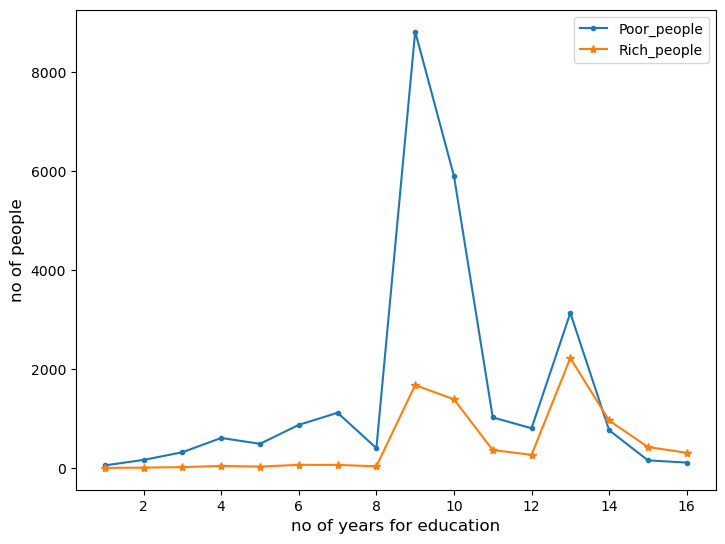

In [313]:
# Creating df having education num wise income details
df_corr_edu_income = df[['Annual-incomerange','Education-num']].groupby('Annual-incomerange').value_counts().unstack().fillna(0)
df_corr_edu_income = df_corr_edu_income.T
print(pd.DataFrame(df_corr_edu_income))
fig = plt.figure()
x=df_corr_edu_income.index
y=df_corr_edu_income['<=50K']
z=df_corr_edu_income['>50K']

ax= fig.add_axes([0.5,0.5,1,1])
ax.plot(x,y,label='Poor_people',marker = '.')
ax.plot(x,z,label='Rich_people',marker = '*')
ax.set_ylabel('no of people',fontsize=12)
ax.set_xlabel('no of years for education',fontsize=12)
plt.legend()


# Analysis based on native country

([<matplotlib.patches.Wedge at 0x2b78a355850>,
 [Text(-1.041649468961892, 0.3535058469267637, 'United-States'),
  Text(1.0201278984461155, -0.41150828765884184, 'Other-countries'),
  Text(1.0982602507317243, -0.061841908627487, 'unknown')],
 [Text(-0.5681724376155775, 0.19282137105096198, '89.6%'),
  Text(0.5564333991524266, -0.2244590659957319, '8.6%'),
  Text(0.5990510458536676, -0.03373195016044745, '1.8%')])

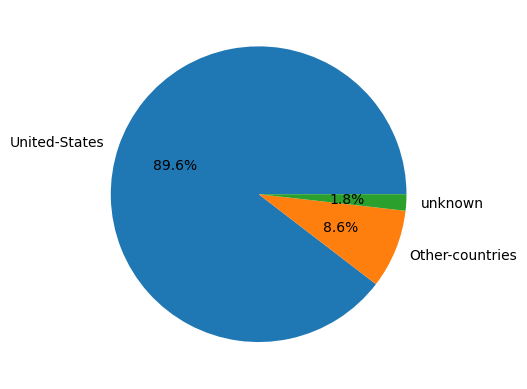

In [20]:
a=df.loc[df['native-country']=='United-States'].count()['Age']
b=df.loc[(df['native-country']!='United-States') & (df['native-country']!='unknown') ].count()['Age']
c=df.loc[df['native-country']=='unknown'].count()['Age']
x=[a,b,c]
plt.pie(x,labels=['United-States','Other-countries','unknown'],autopct = '%0.1f%%')


In [21]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual-incomerange
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<BarContainer object of 2 artists>

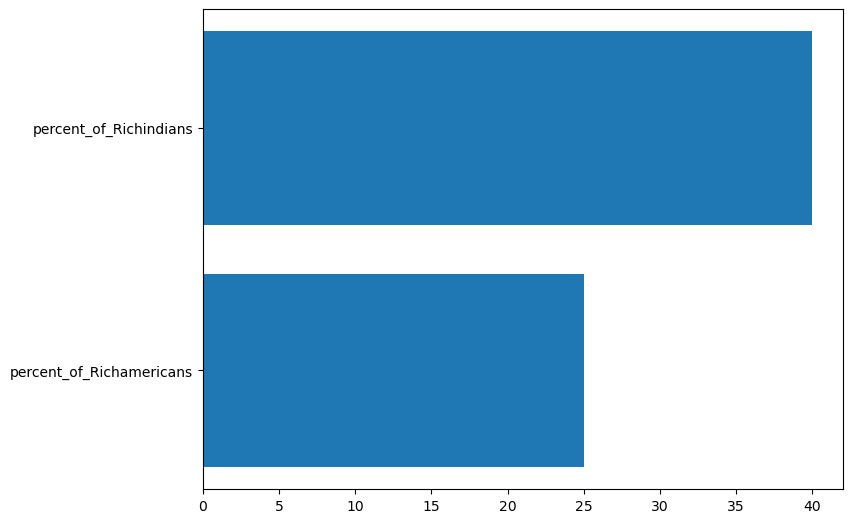

In [52]:
rich_americans = df.loc[(df['native-country'] == 'United-States') & (df['Annual-incomerange']=='>50K')].count()['Age']
rich_indian = df.loc[(df['native-country'] == 'India') & (df['Annual-incomerange']=='>50K')].count()['Age']
Totalamericans=df.loc[df['native-country'] == 'United-States'].count()['Age']
Totalindian=df.loc[df['native-country'] == 'India'].count()['Age']

richUS = round(rich_americans/Totalamericans*100)
richIND = round(rich_indian/Totalindian*100)
z=[richUS,richIND]
fig = plt.figure()
ax= fig.add_axes([0,0,1,1])
plt.barh(y=['percent_of_Richamericans','percent_of_Richindians'],width=z)

In [55]:
american_gain=df.loc[df['native-country'] == 'United-States'].sum()['capital-gain']
american_loss=df.loc[df['native-country'] == 'United-States'].sum()['capital-loss']
print(american_gain,american_loss)
print('Total capital gain of americans is more than the total capital loss of americans')

31772837 2581854
Total capital gain of americans is more than the total capital loss of americans
